In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as nd
df = nd.read_csv('/content/drive/MyDrive/ML DL DATASET/Housing (1).csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# **Data Encoding**

**Ordinal Encoder**

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
enc = OrdinalEncoder()
df['mainroad'] = enc.fit_transform(df[['mainroad']])
df['guestroom'] = enc.fit_transform(df[['guestroom']])
df['basement'] = enc.fit_transform(df[['basement']])
df['hotwaterheating'] = enc.fit_transform(df[['hotwaterheating']])
df['airconditioning'] = enc.fit_transform(df[['airconditioning']])
df['prefarea'] = enc.fit_transform(df[['prefarea']])

In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,furnished
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,furnished
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,semi-furnished
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,furnished
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,furnished


In [ ]:
rank = ['unfurnished', 'semi-furnished', 'furnished']
oe = OrdinalEncoder(categories=[rank])
df['furnishingstatus'] = oe.fit_transform(df[['furnishingstatus']])

In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,furnished
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,furnished
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,semi-furnished
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,furnished
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,furnished


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

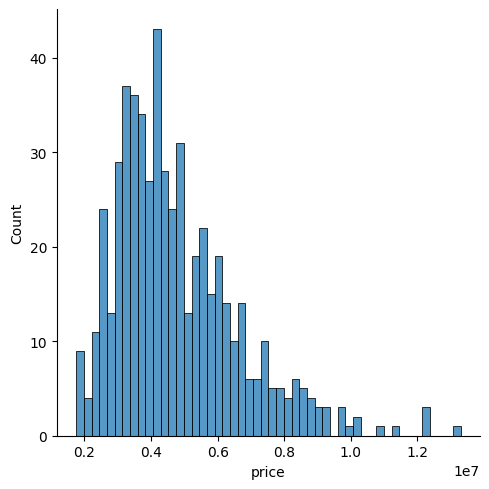

In [11]:
sns.displot(df['price'], bins = 50)

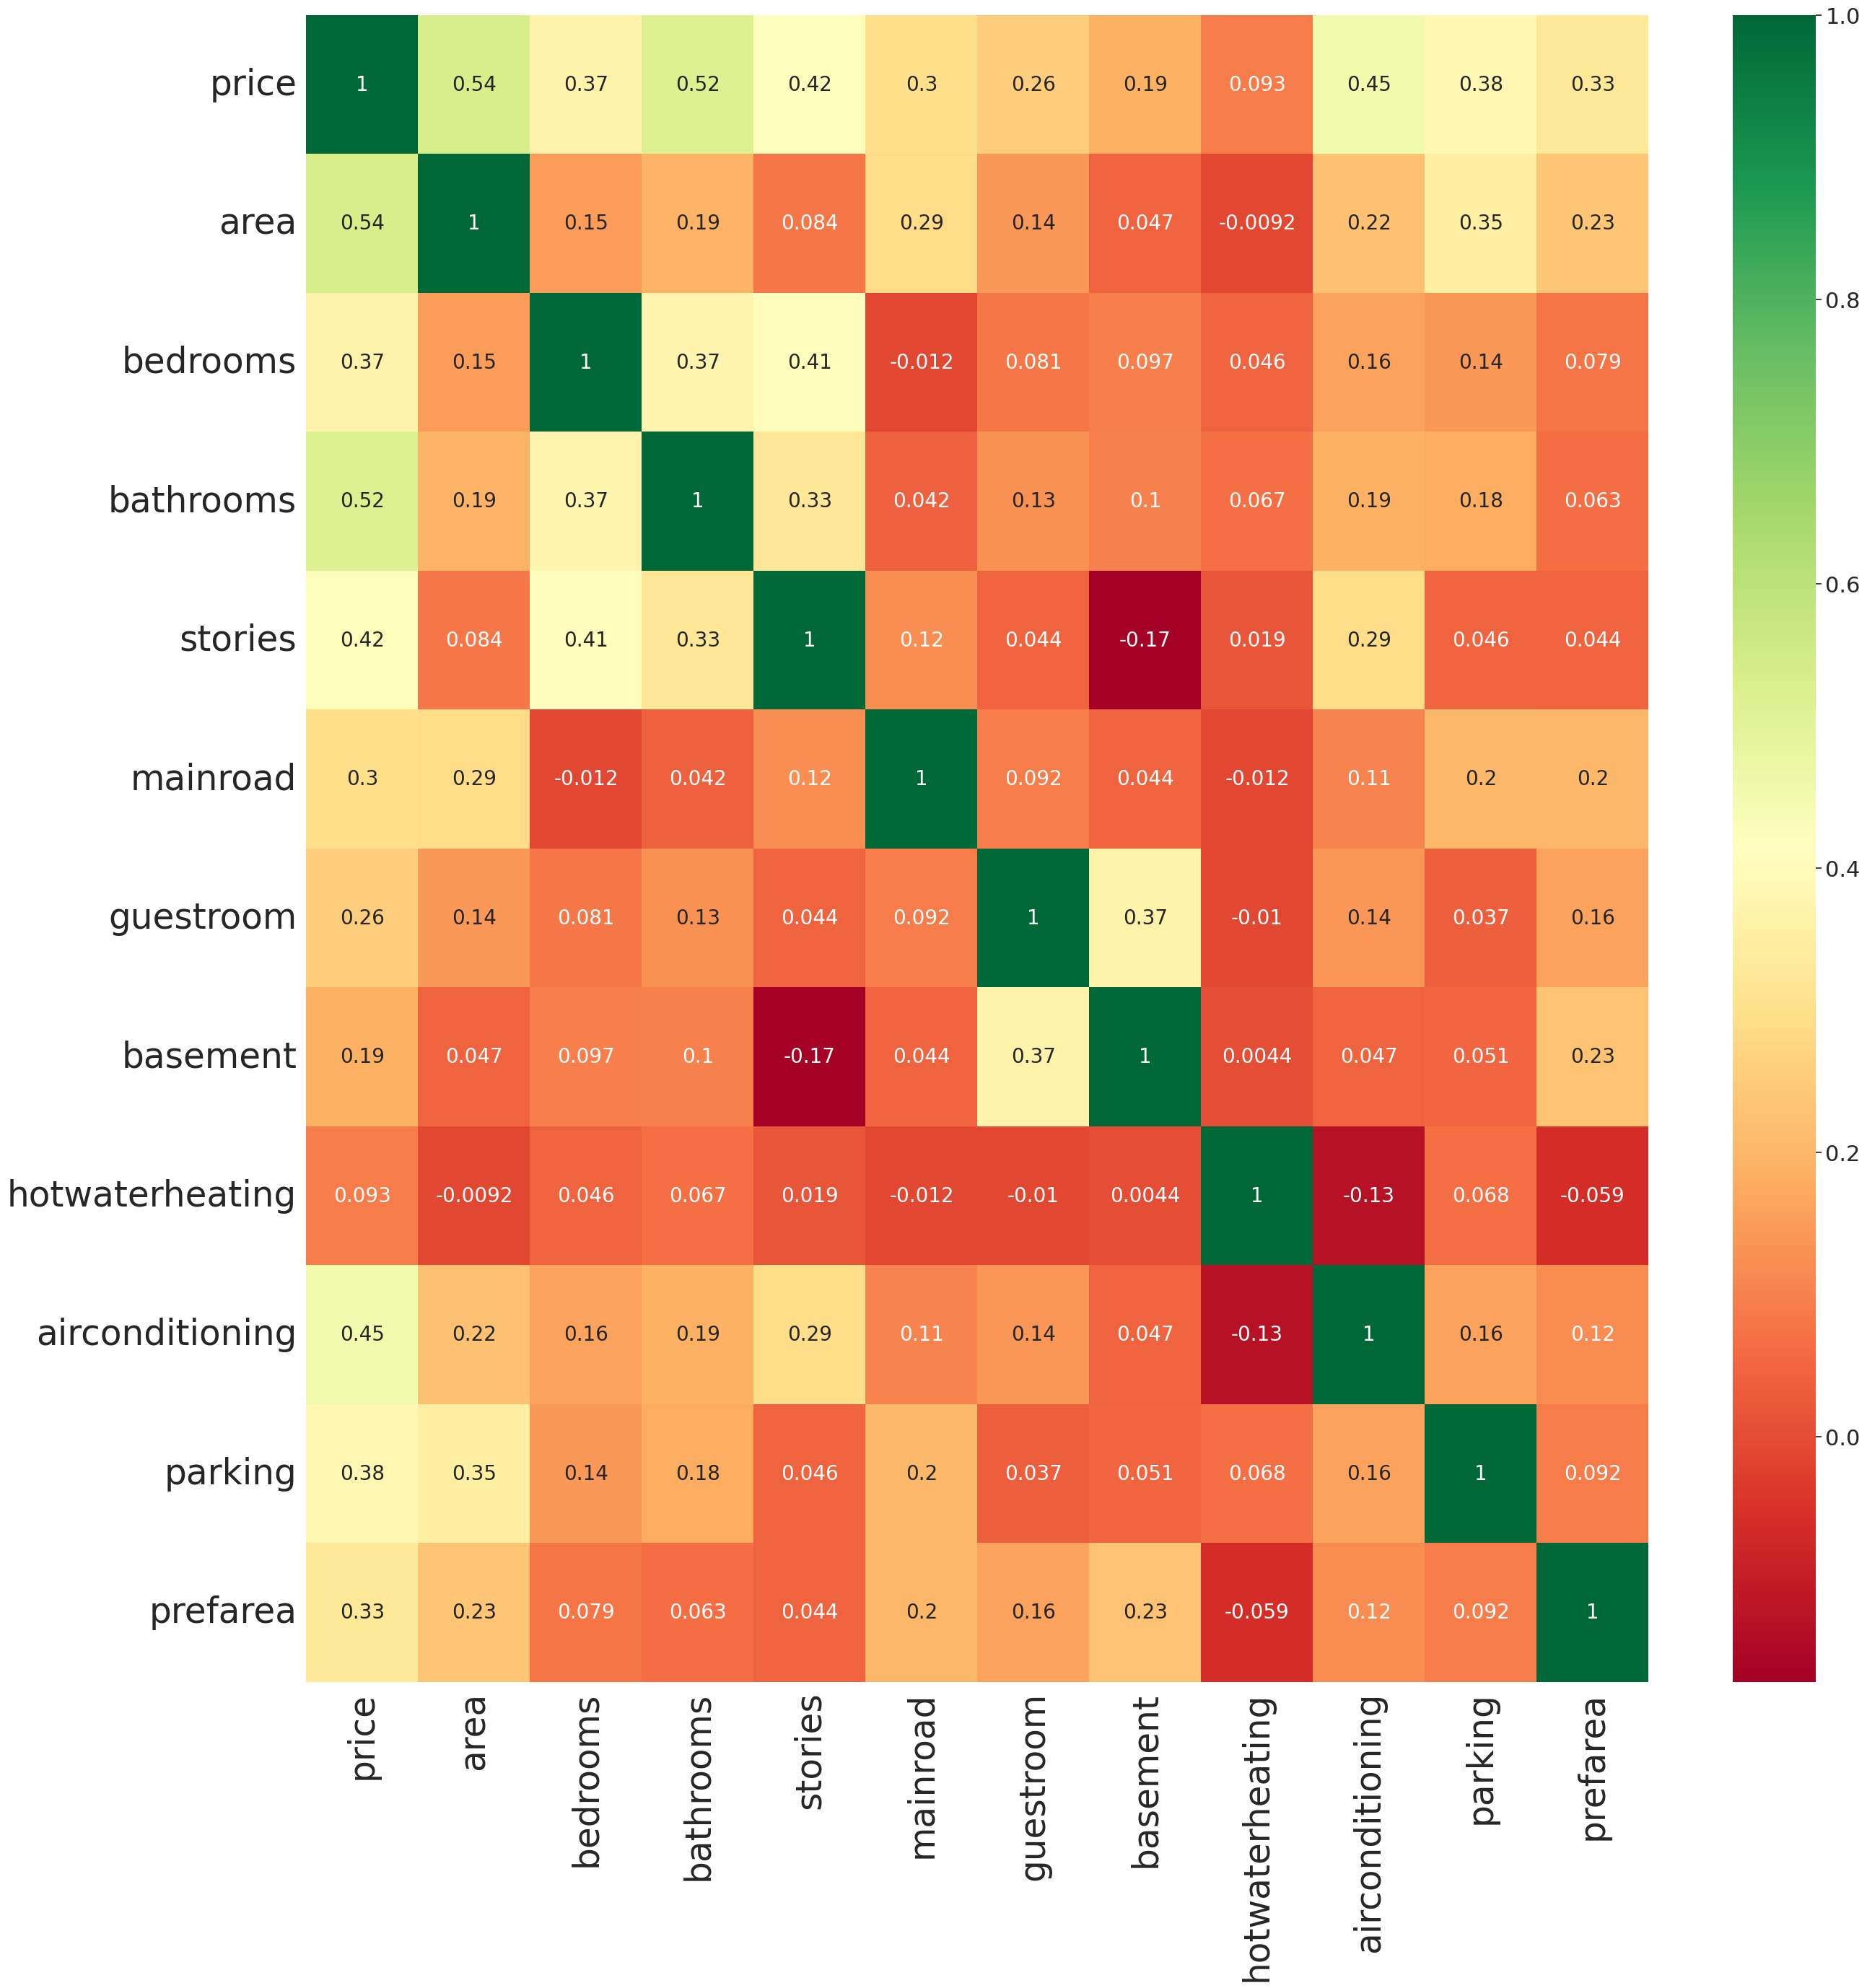

In [12]:
sns.set(font_scale=2)
plt.subplots(figsize=(30, 30))
heat_plot = sns.heatmap(df.corr(method='pearson'), annot=True, cmap='RdYlGn', annot_kws={'size': 20})  # person correlation / heatmap

plt.yticks(fontsize = 35)
plt.xticks(fontsize = 35)

plt.show()

In [13]:
x = df.drop(['price'], axis=1)
y = df['price']

In [14]:
print(x.shape)
print(y.shape)

(545, 12)
(545,)


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

ValueError: could not convert string to float: 'furnished'

In [ ]:
x_train

array([[0.36769759, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28865979, 0.4       , 0.        , ..., 0.33333333, 0.        ,
        0.        ],
       [0.03402062, 0.4       , 0.        , ..., 0.33333333, 1.        ,
        0.        ],
       ...,
       [0.20274914, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.12371134, 0.4       , 0.        , ..., 0.66666667, 0.        ,
        0.        ],
       [0.17525773, 0.4       , 0.        , ..., 0.33333333, 0.        ,
        1.        ]])

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()   # fit_intercept, copy_x, n_jobs

<font color = "lime"> **y = Wx + b** ; </br>
same as y = mx + c </br>
W is weight(slope) b is bias(intercept term / constant)

In [ ]:
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
y_pred

array([4301139.35826454, 3515032.43418788, 6440228.73169902,
       7133080.49588558, 3846595.54758155, 6230523.00752904,
       4899443.95735995, 3371878.51676363, 3946461.84109872,
       2057743.91583061, 4971685.462857  , 4106997.80706303,
       3387437.96209468, 8695850.99161538, 3665076.97239767,
       4050388.05309211, 7198142.45500538, 3797752.47181111,
       3043350.61371505, 3079191.40570502, 4656922.18314301,
       5409712.30697643, 7374268.9787038 , 7230056.64940285,
       4859091.99986929, 4098009.8401651 , 2236734.62483076,
       3551759.90103897, 8349755.9894687 , 7347532.70437813,
       6344841.2477578 , 4760886.67431446, 5256549.30497851,
       4076596.24380331, 3787158.78585093, 2655118.89100793,
       8146112.31136658, 2612516.01807044, 8364176.35419598,
       3793425.35441835, 8695931.19950237, 7604037.01462346,
       7155697.3360376 , 8511314.30068266, 7720881.87979536,
       3107513.40387034, 3724570.43885899, 7851714.31526693,
       3492698.19549487,

In [ ]:
y_test

436    3290000
318    4060000
51     7420000
190    5040000
425    3360000
        ...   
218    4830000
252    4515000
133    5810000
276    4305000
173    5250000
Name: price, Length: 109, dtype: int64

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

In [ ]:
R2 = r2_score(y_pred, y_test)
R2

0.5360031936767713

In [ ]:
MSE = mean_squared_error(y_pred, y_test)
MSE

1579425005534.434

In [ ]:
RMSE = math.sqrt(MSE)
RMSE

1256751.7676671213

In [ ]:
MAE = mean_absolute_error(y_pred, y_test)
MAE

972272.9960816746